In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

c:\Users\miran\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


### Initial data import

In [ ]:
'''#Import data
filename = 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

df = pd.read_csv(filename)

#Print the header
#print(df.head())

#split up the date into year, month, day
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')
df['Year'] = df['CRASH DATE'].dt.year

#print(df.head())

# Remove years 2012 and 2025
df = df[(df['Year'] != 2012) & (df['Year'] != 2025)]

#print(df.head())

# Save the merged DataFrame to a CSV file
df.to_csv("sorted_data.csv", index=False)'''

FileNotFoundError: [Errno 2] No such file or directory: 'Motor_Vehicle_Collisions_-_Crashes_20250415.csv'

### Fundamental distributions

In [114]:
file = 'sorted_data.csv'

data = pd.read_csv(file)

C:\Users\miran\AppData\Local\Temp\ipykernel_1460\2640694134.py:3: DtypeWarning: Columns (3,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file)


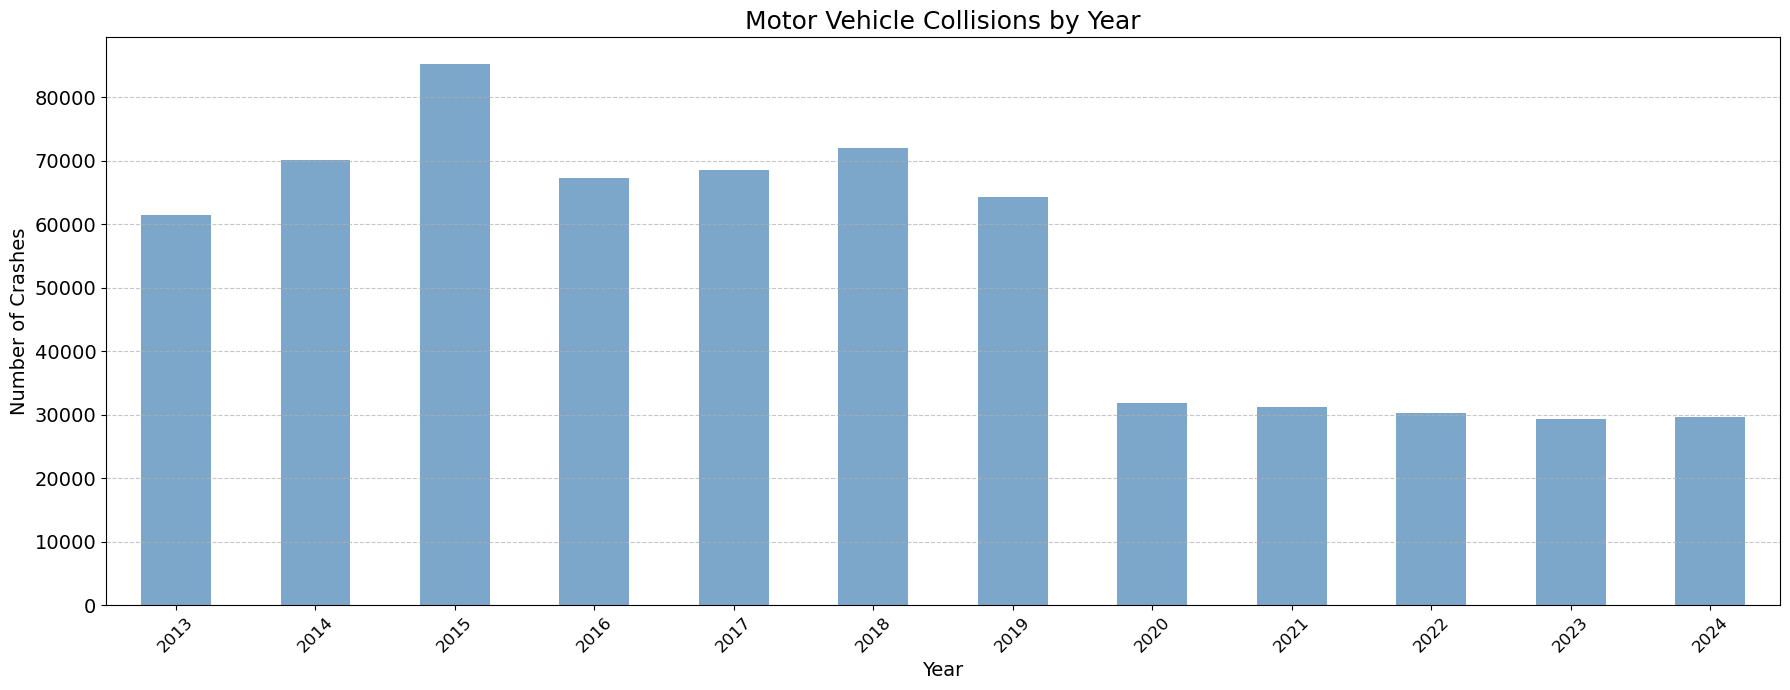

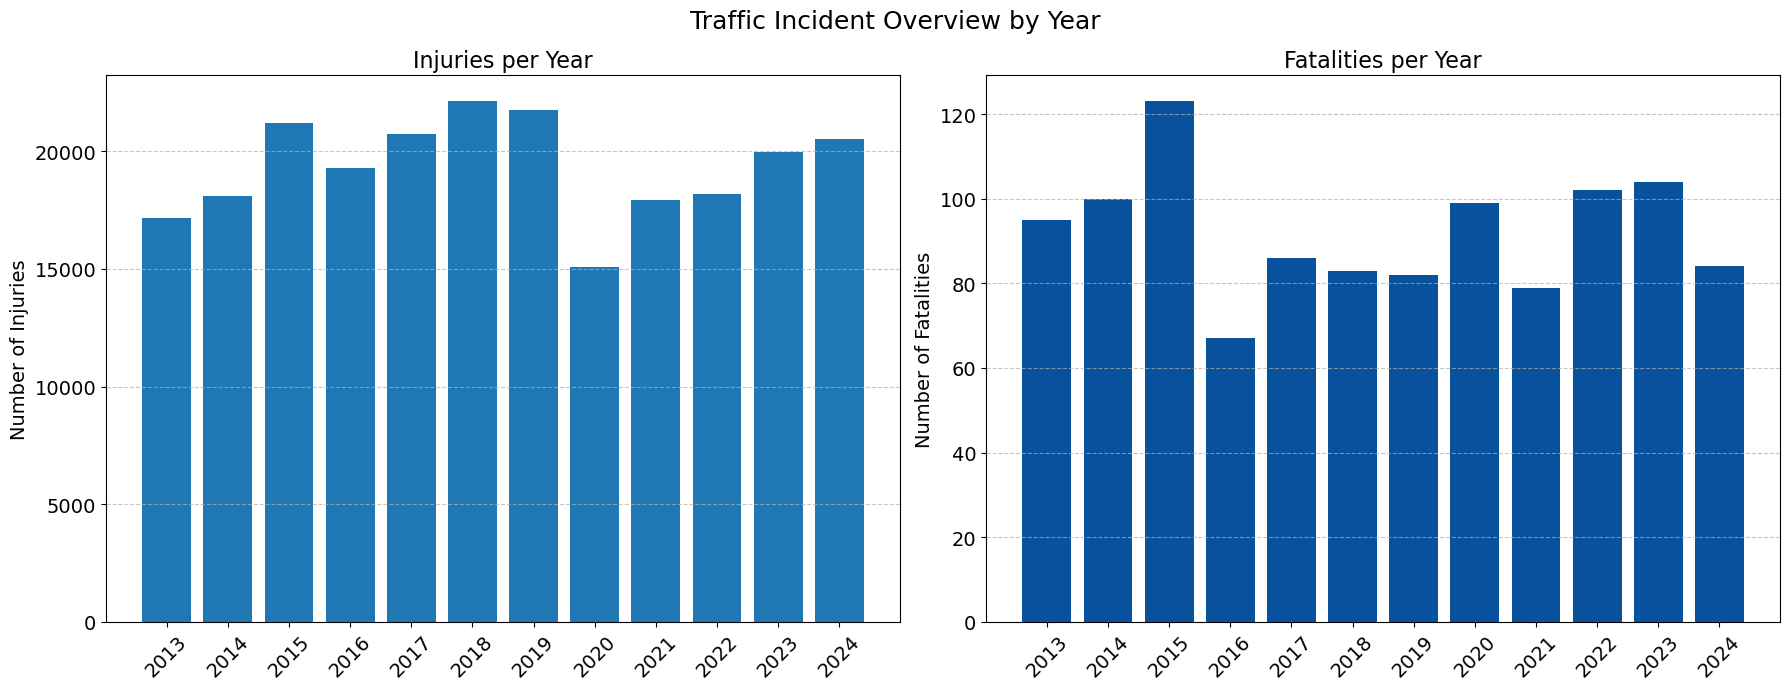

In [115]:
# Data processing
crashes = data['Year'].value_counts().sort_index()
injuries = data['NUMBER OF PERSONS INJURED'].groupby(data['Year']).sum()
fatalities = data['NUMBER OF PERSONS KILLED'].groupby(data['Year']).sum()

years = sorted(data['Year'].unique())  # sorted years
x = np.arange(len(years))  # x locations

plt.figure(figsize=(18, 7))
data['Year'].value_counts().sort_index().plot(kind='bar', color='#4682b4', alpha=0.7, fontsize=14)
plt.title('Motor Vehicle Collisions by Year', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
# Save the figure
plt.savefig('motor_vehicle_collisions_by_year.png', dpi=300, bbox_inches='tight')
plt.show()

# Create horizontal subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 row, 2 columns

# Plot each category
axes[0].bar(x, injuries, color='#1f78b4')
axes[0].set_title('Injuries per Year', fontsize=16)
axes[0].set_ylabel('Number of Injuries', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(years, rotation=45, fontsize=14)
axes[0].tick_params(axis='both', labelsize=14)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

axes[1].bar(x, fatalities, color='#08519c')
axes[1].set_title('Fatalities per Year', fontsize=16)
axes[1].set_ylabel('Number of Fatalities', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(years, rotation=45, fontsize=14)
axes[1].tick_params(axis='both', labelsize=14)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)  # <--- Grid here

# Overall title and layout
fig.suptitle('Traffic Incident Overview by Year', fontsize=18)
plt.tight_layout()  # leave space for title
#Save the figure
plt.savefig('traffic_incidents_overview.png', dpi=300, bbox_inches='tight')
plt.show()




C:\Users\miran\AppData\Local\Temp\ipykernel_1460\4282396197.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


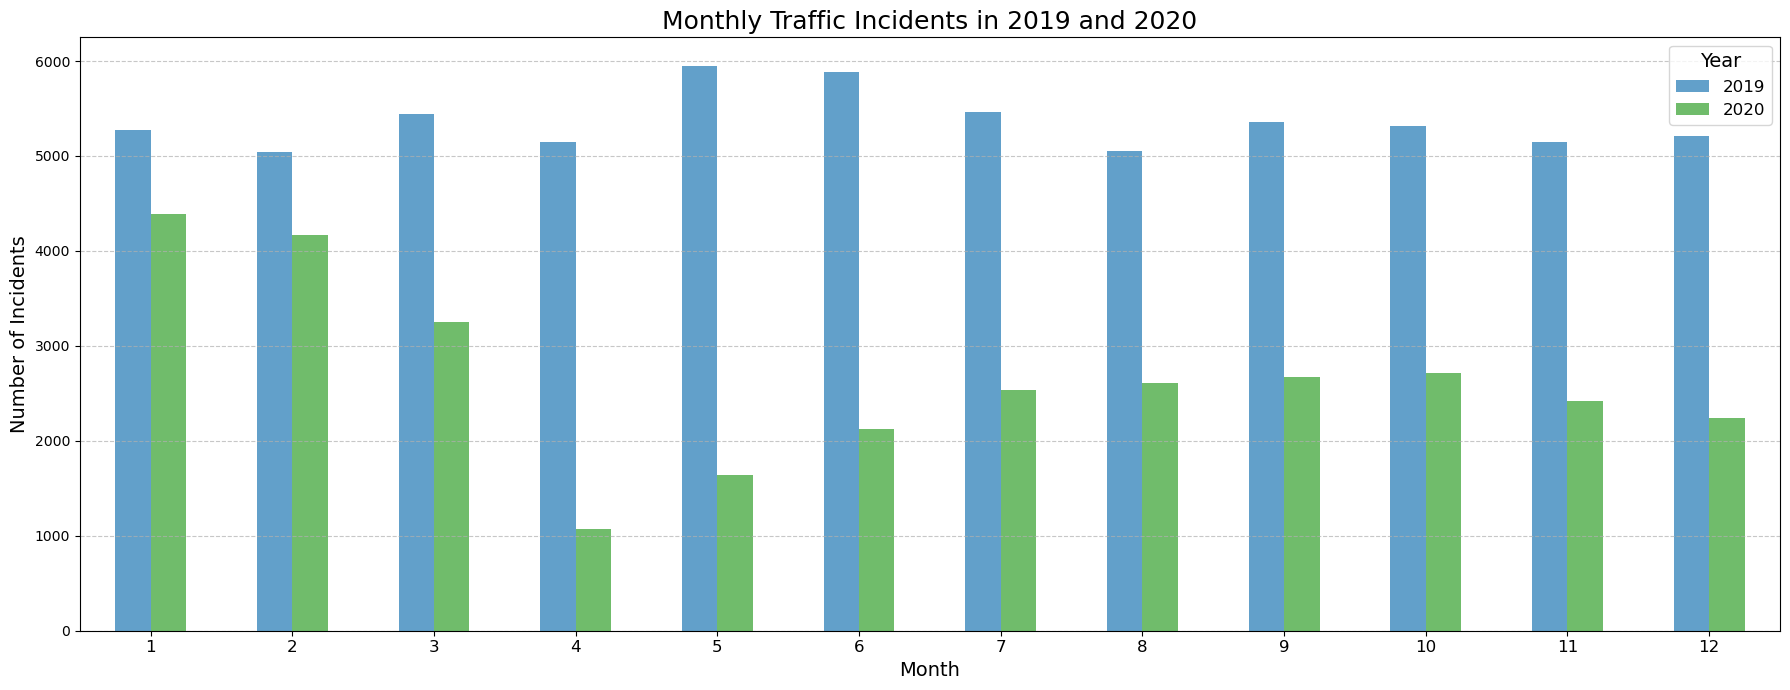

In [46]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Traffic Incidents in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Incidents', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_1460\3263520092.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


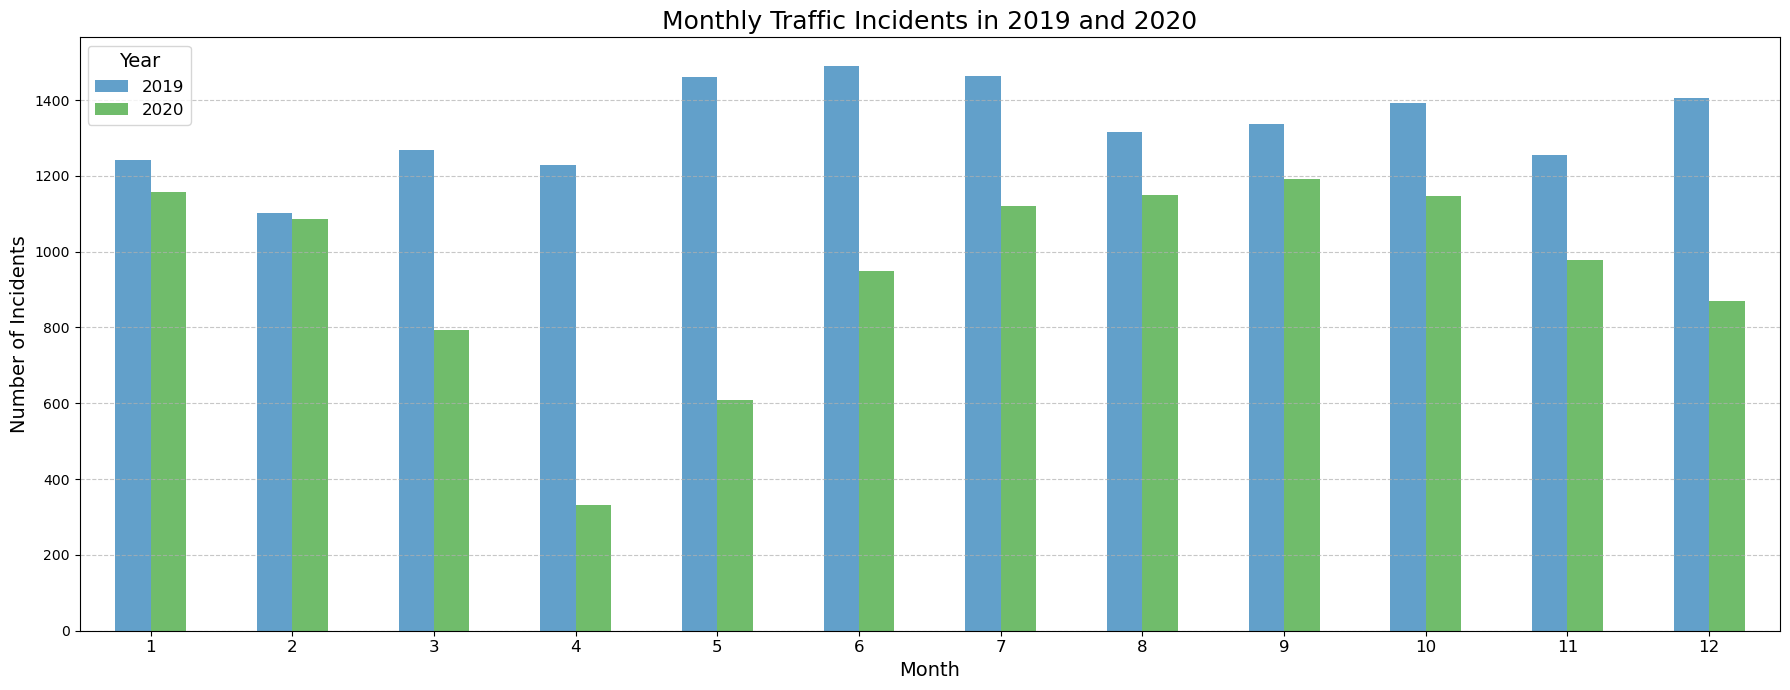

In [ ]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

data_19_20_in = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20_in.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Injuries in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_1460\1262953389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


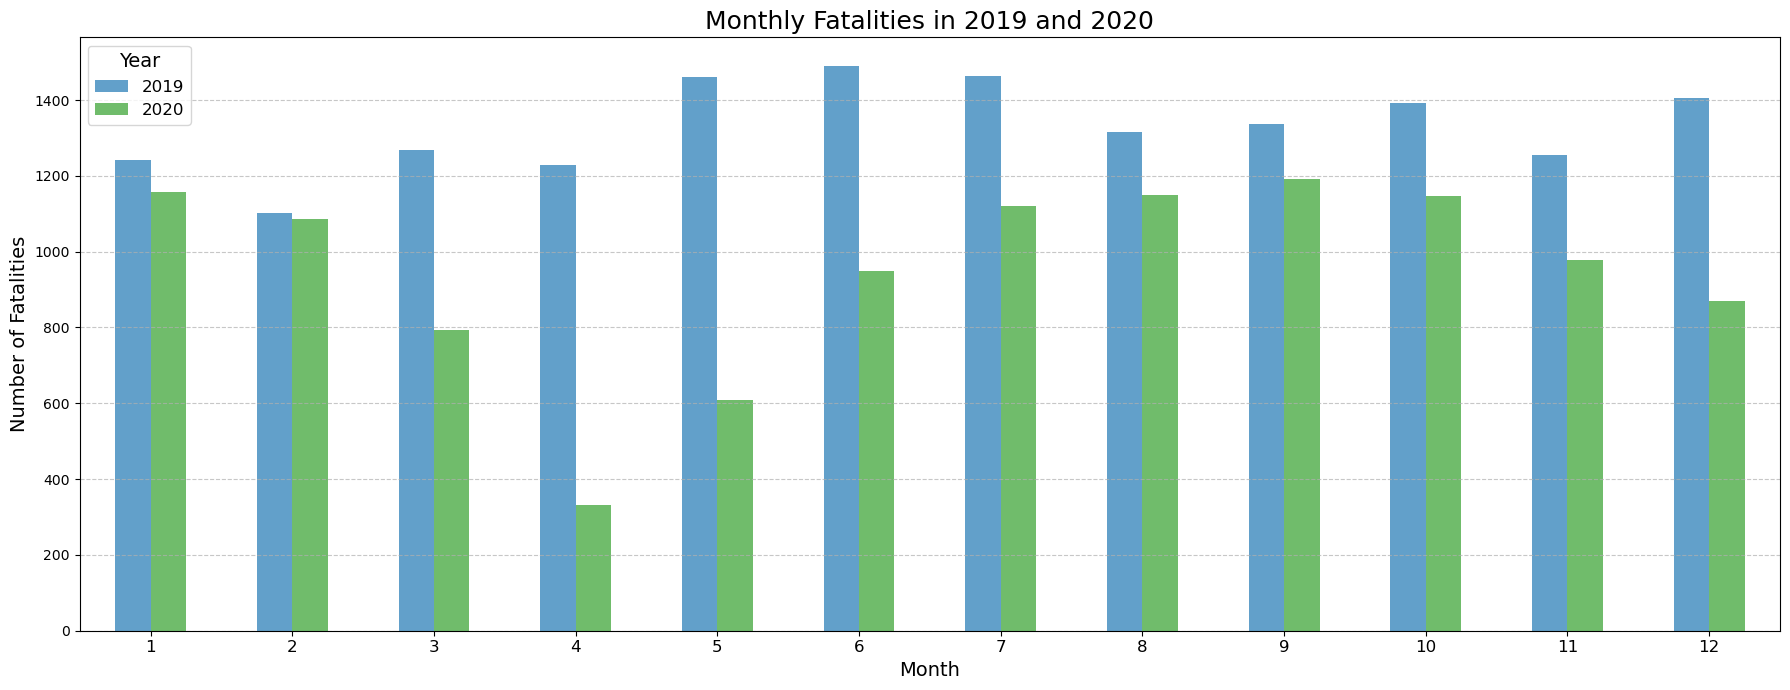

In [88]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month

data_19_20_fa = data_19_20[data_19_20['NUMBER OF PERSONS INJURED'] > 0]

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20_fa.groupby(['Month', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Fatalities in 2019 and 2020', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Fatalities', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()

C:\Users\miran\AppData\Local\Temp\ipykernel_1460\1652737517.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month


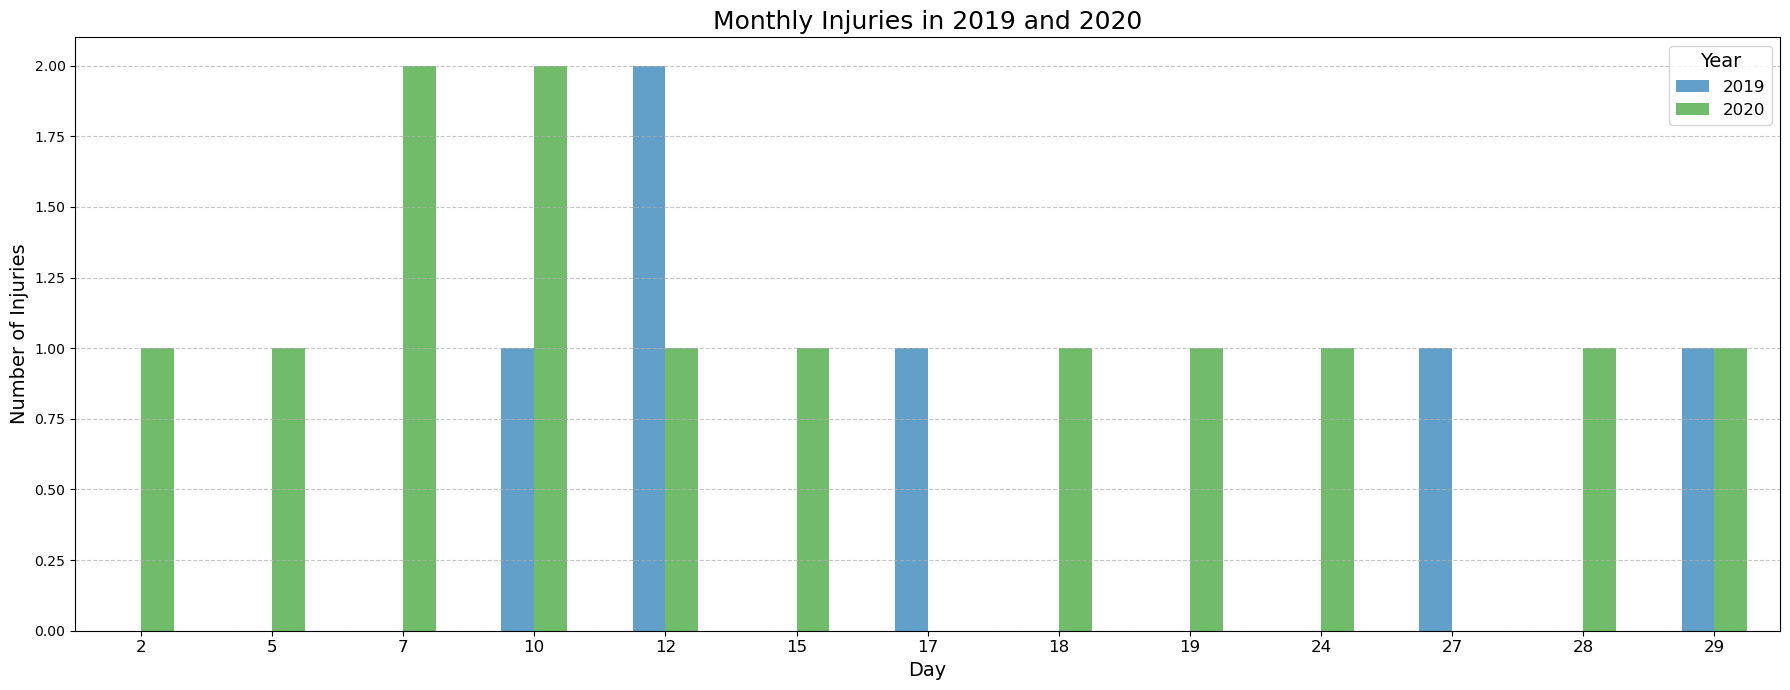

In [82]:
# Filter data for 2019 and 2020
data_19_20 = data[(data['Year'] == 2019) | (data['Year'] == 2020)]

# Create a new column for the month
data_19_20['Month'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.month
data_19_20 = data_19_20[data_19_20['Month'] == 9]
data_19_20['Day'] = pd.to_datetime(data_19_20['CRASH DATE']).dt.day

data_19_20_in = data_19_20[data_19_20['NUMBER OF PERSONS KILLED'] > 0]

# Create bar plot with months on the x-axis
fig, ax = plt.subplots(figsize=(18, 7))
data_19_20_in.groupby(['Day', 'Year']).size().unstack().plot(kind='bar', ax=ax, color=['#1f78b4', '#33a02c'], alpha=0.7)
plt.title('Monthly Injuries in 2019 and 2020', fontsize=18)
plt.xlabel('Day', fontsize=14)
plt.ylabel('Number of Injuries', fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Year', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


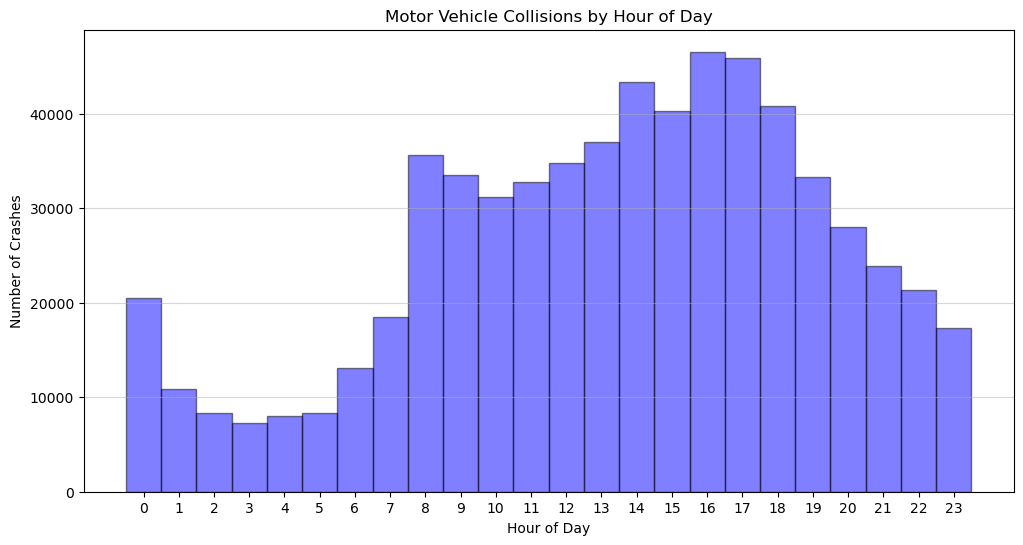

In [3]:
# Sort the time of day into hours only
data['Hour'] = pd.to_datetime(data['CRASH TIME'], format='%H:%M').dt.hour

# Plot the crashes at the time of day
plt.figure(figsize=(12, 6))
plt.hist(data['Hour'], bins=np.arange(0, 25) - 0.5, color='blue', alpha=0.5, edgecolor='black', align='mid')
plt.title('Motor Vehicle Collisions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Crashes')
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', alpha=0.5)
plt.show()


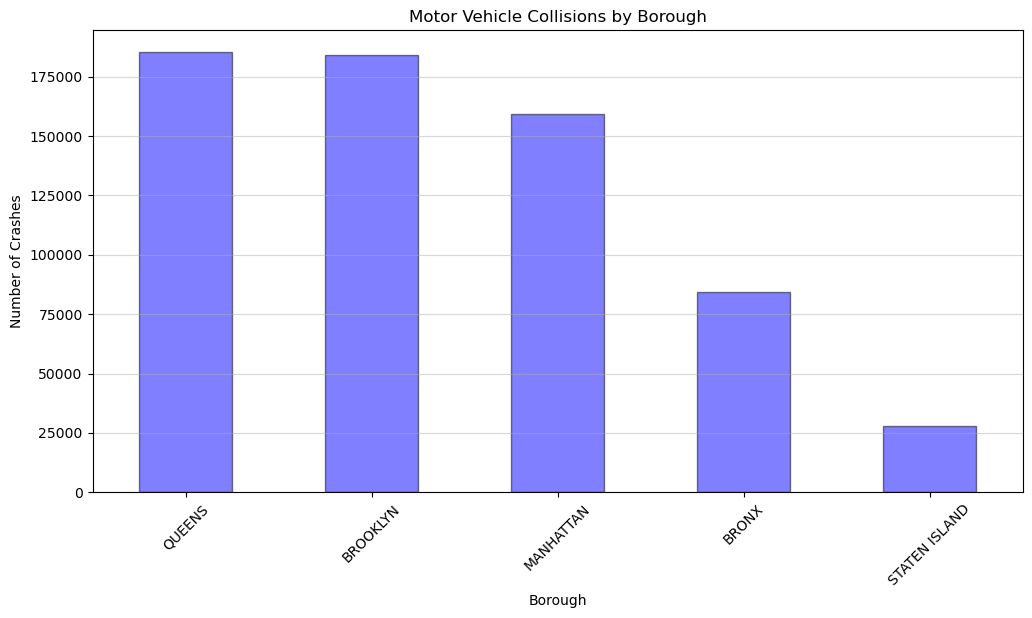

In [4]:
# Plot the crashes by borrough
plt.figure(figsize=(12, 6))
data['BOROUGH'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Borough')
plt.xlabel('Borough')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()


#### Number of persons injured

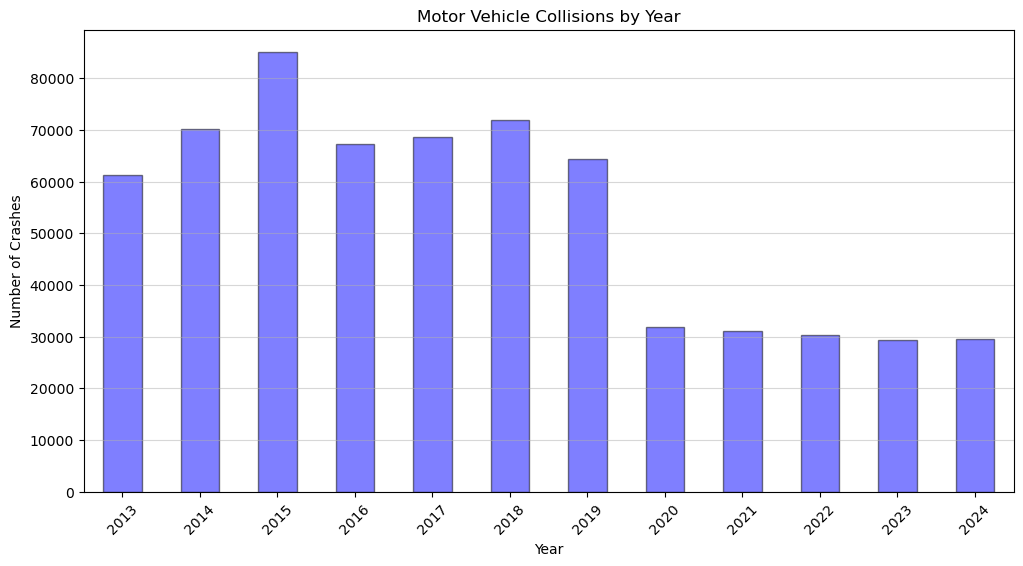

Year
2013    61375
2014    70159
2015    85139
2016    67309
2017    68557
2018    71973
2019    64286
2020    31823
2021    31164
2022    30259
2023    29359
2024    29574
Name: count, dtype: int64


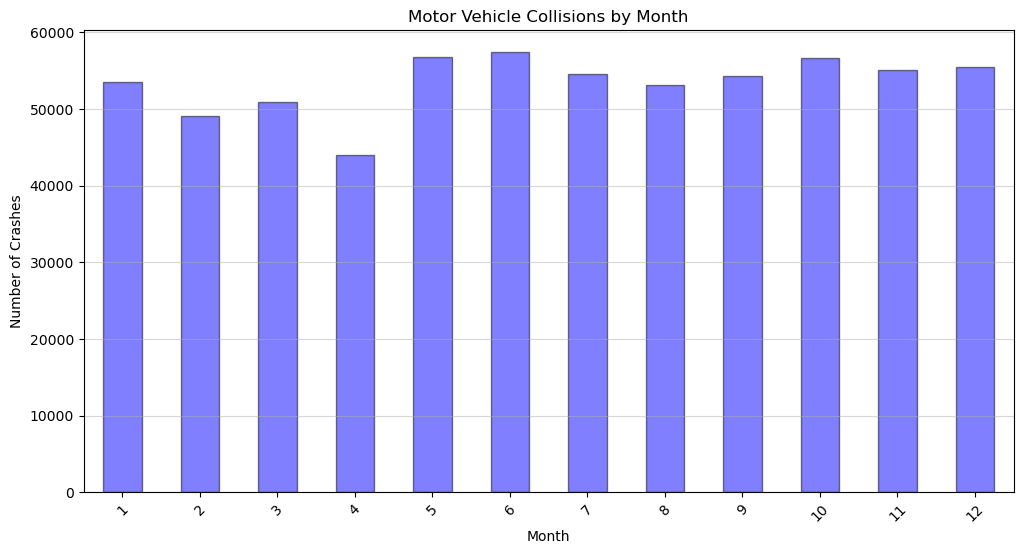

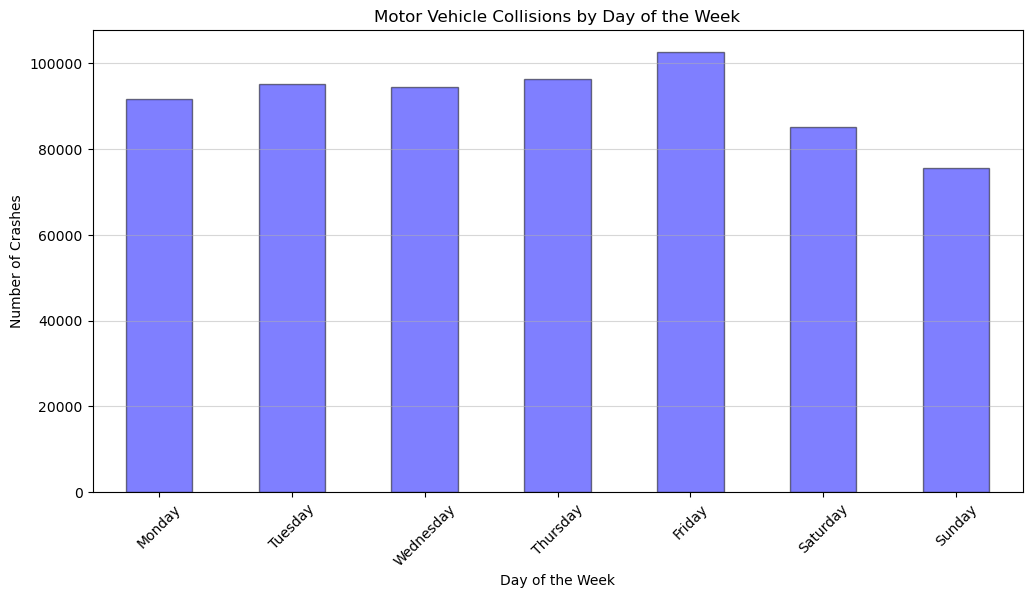

In [ ]:
## Plot the crashes by year
plt.figure(figsize=(12, 6))
data['Year'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()
# Print total number of crashes per year
#print(data['Year'].value_counts().sort_index()) 

# Plot the crashes by month
plt.figure(figsize=(12, 6))
data['Month'] = pd.to_datetime(data['CRASH DATE']).dt.month
data['Month'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot the crashes by day of the week
plt.figure(figsize=(12, 6))
data['Day of Week'] = pd.to_datetime(data['CRASH DATE']).dt.day_name()
data['Day of Week'] = pd.Categorical(data['Day of Week'], categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
data['Day of Week'].value_counts().sort_index().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Motor Vehicle Collisions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()



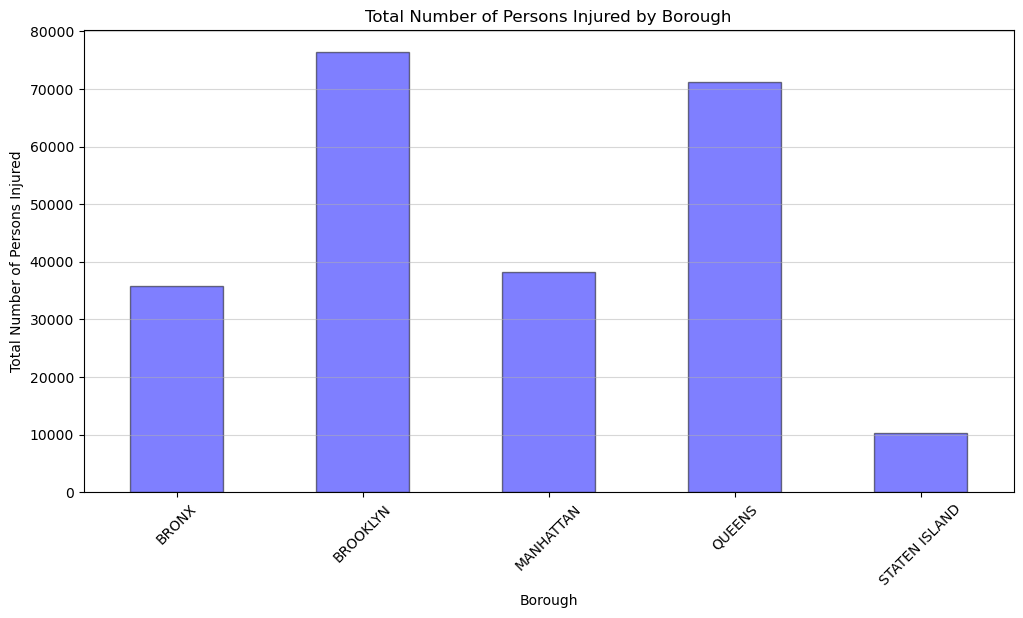

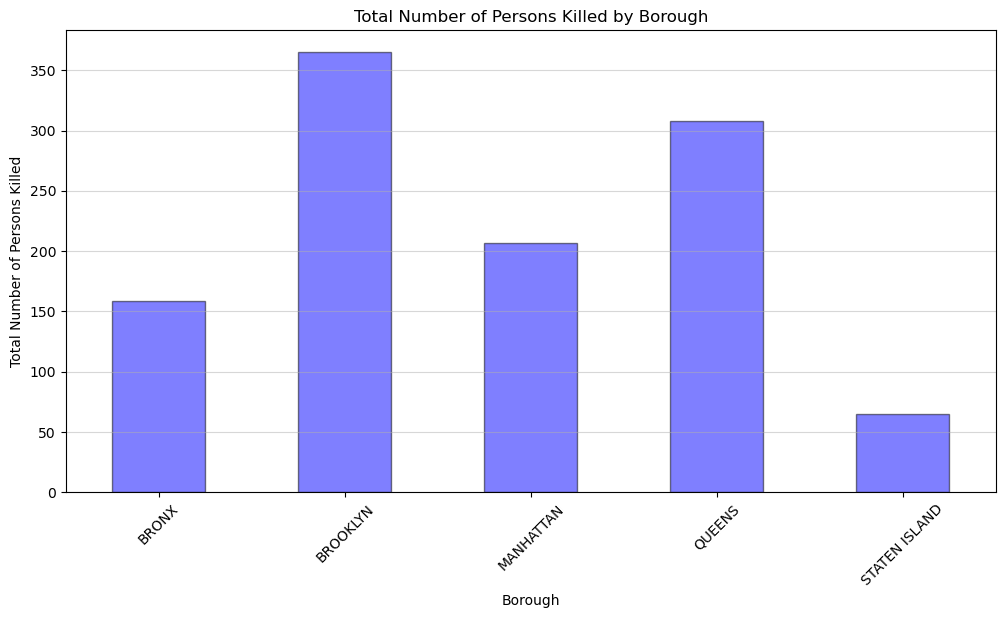

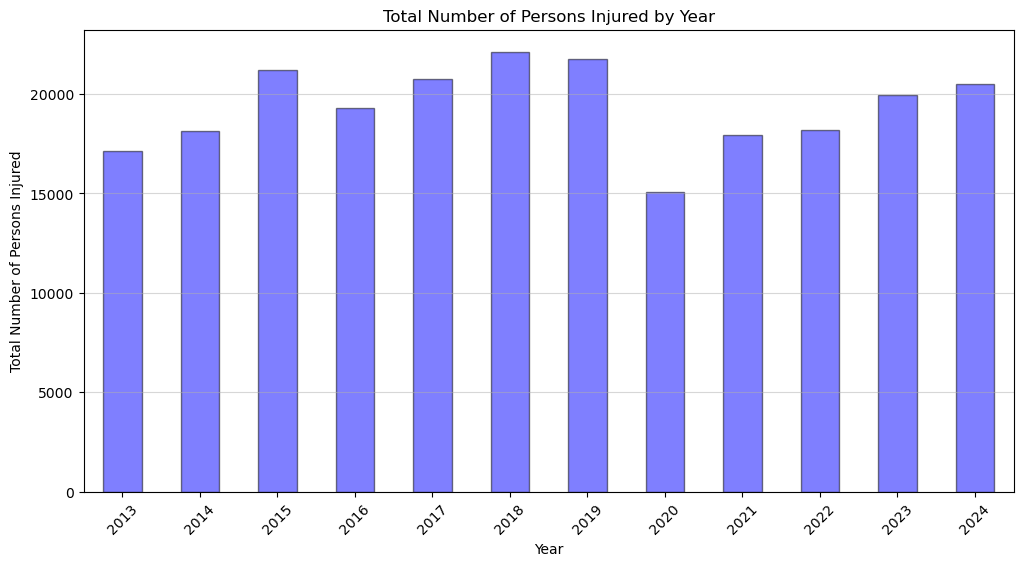

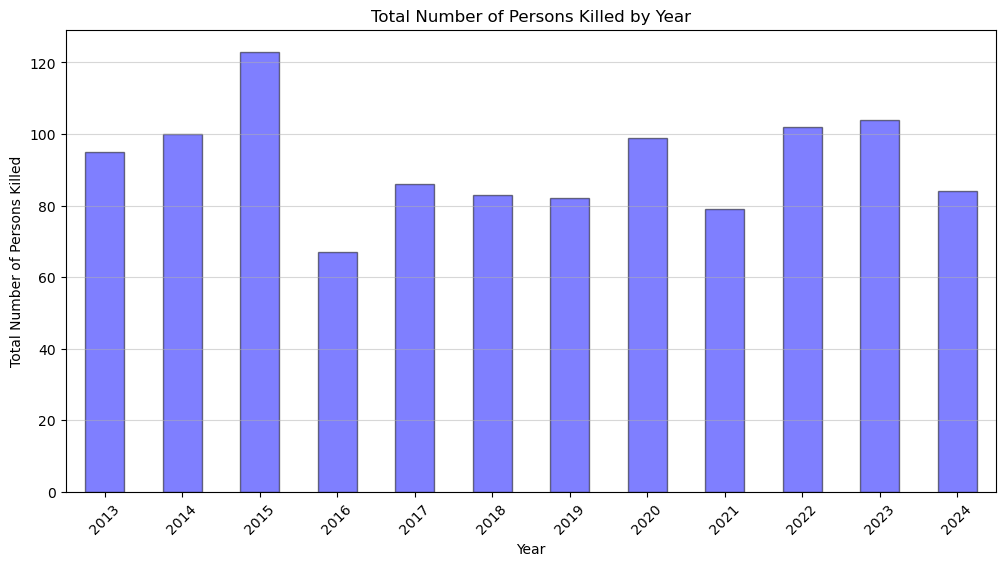

In [6]:
# Plot "number of persons injured" per borough  
plt.figure(figsize=(12, 6))
data_b = data.copy()
data_b['NUMBER OF PERSONS INJURED'].groupby(data_b['BOROUGH']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Injured by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Injured')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons killed" per
plt.figure(figsize=(12, 6))
data_b['NUMBER OF PERSONS KILLED'].groupby(data_b['BOROUGH']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Killed by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Number of Persons Killed')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons injured" per year
plt.figure(figsize=(12, 6))
data['NUMBER OF PERSONS INJURED'].groupby(data['Year']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Injured by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Persons Injured')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Plot "number of persons killed" per year
plt.figure(figsize=(12, 6))
data['NUMBER OF PERSONS KILLED'].groupby(data['Year']).sum().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Total Number of Persons Killed by Year')
plt.xlabel('Year')
plt.ylabel('Total Number of Persons Killed')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.5)
plt.show()

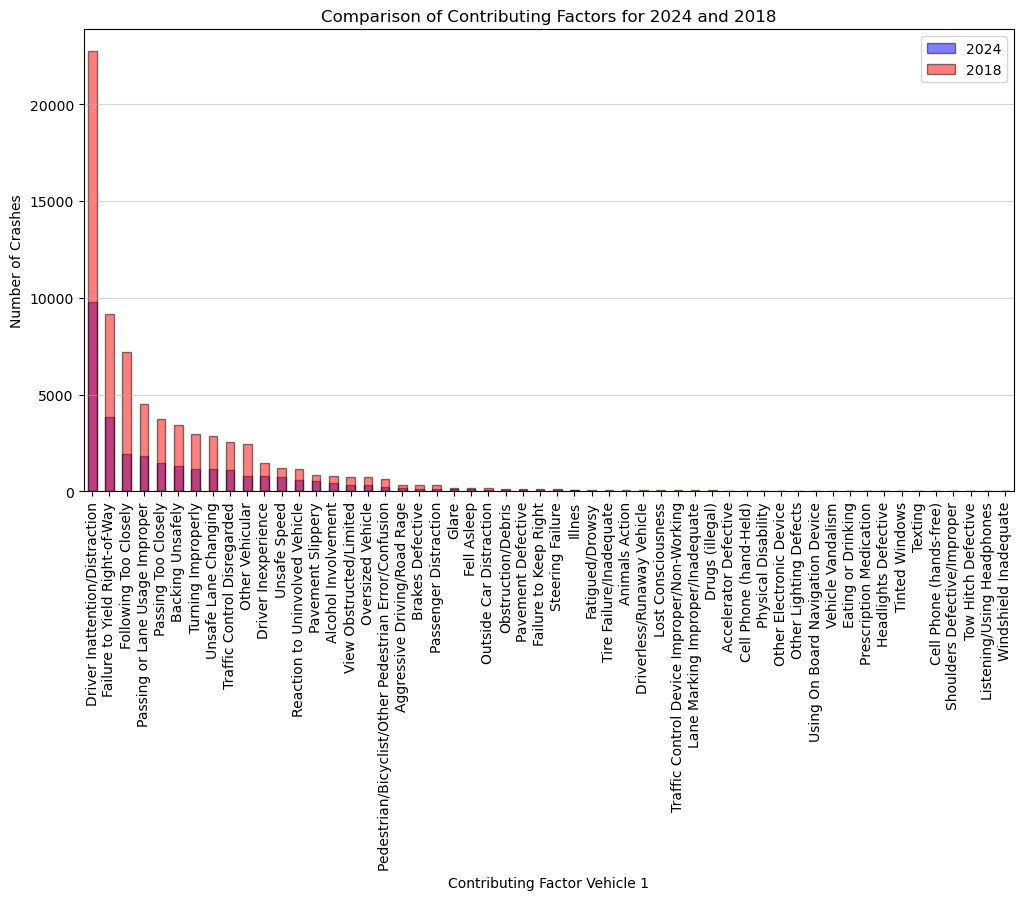

In [7]:
## Compare correlation between "CONTRIBUTING FACTOR VEHICLE 1" and "NUMBER OF PERSONS INJURED" for 2024 and 2018
plt.figure(figsize=(12, 6))
data_2024 = data[data['Year'] == 2024]
data_2018 = data[data['Year'] == 2018]
data_2024['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='bar', color='blue', alpha=0.5, edgecolor='black', label='2024')
data_2018['CONTRIBUTING FACTOR VEHICLE 1'].value_counts().plot(kind='bar', color='red', alpha=0.5, edgecolor='black', label='2018')
plt.title('Comparison of Contributing Factors for 2024 and 2018')
plt.xlabel('Contributing Factor Vehicle 1')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.legend()
plt.grid(axis='y', alpha=0.5)
plt.show()


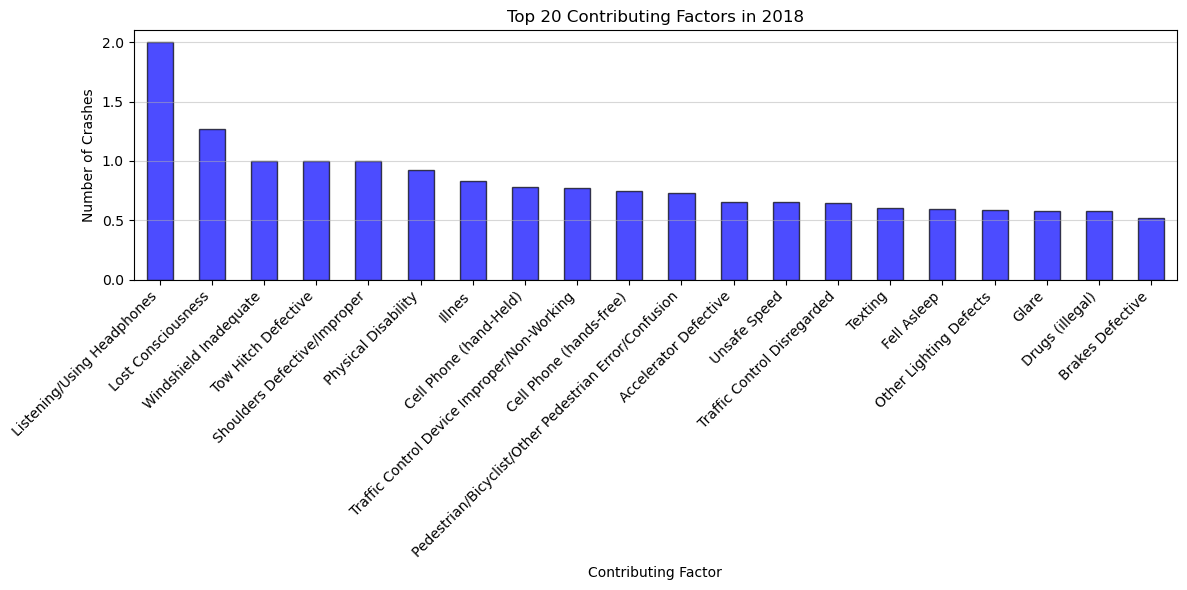

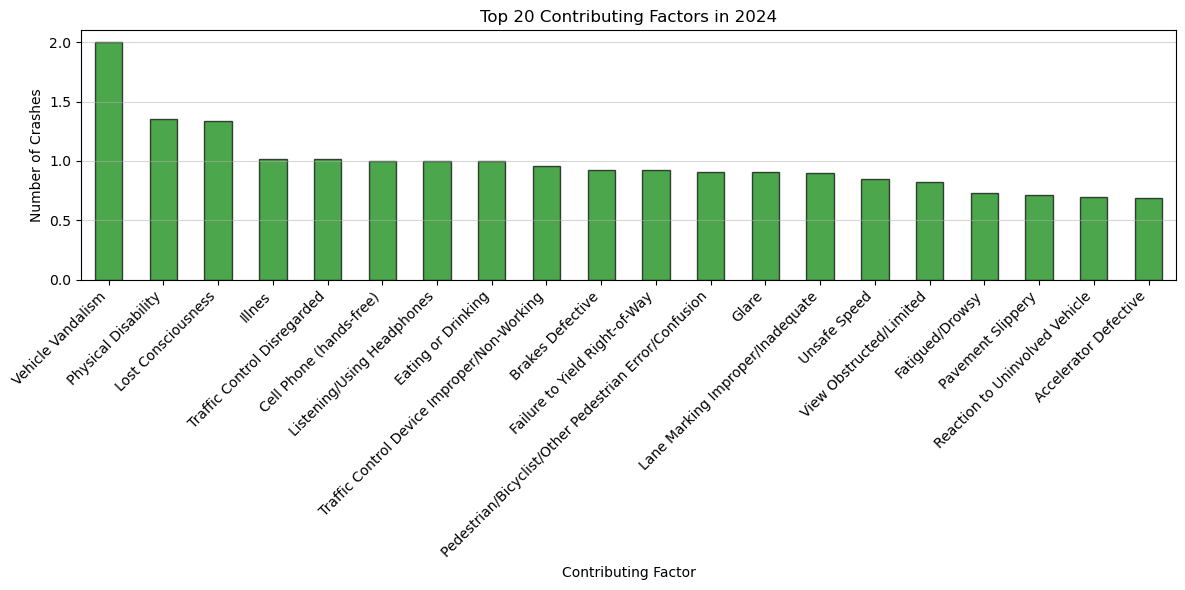

In [11]:
# Plot for 2018
plt.figure(figsize=(12, 6))
top_20_factors_2018.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2018')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Plot for 2024
plt.figure(figsize=(12, 6))
top_20_factors_2024.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2024')
plt.xlabel('Contributing Factor')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


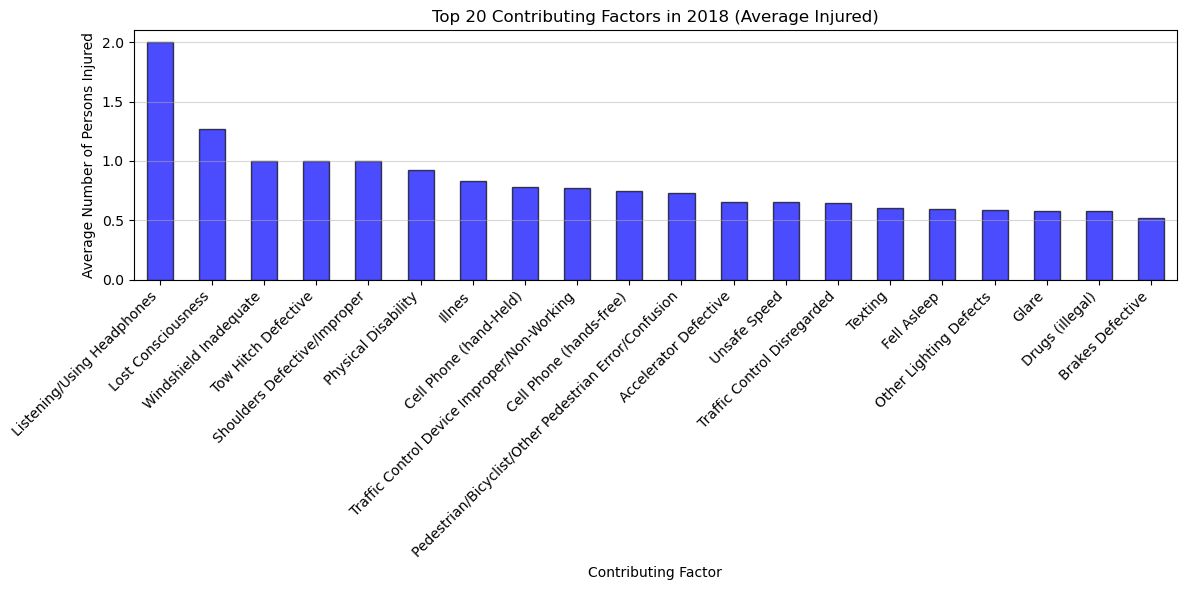

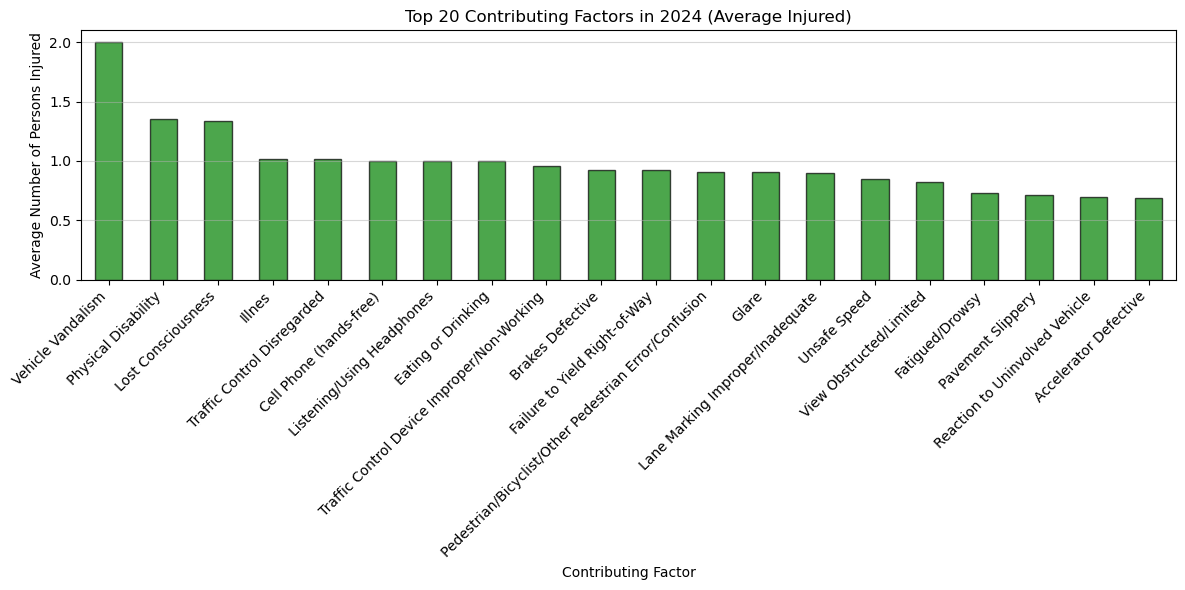

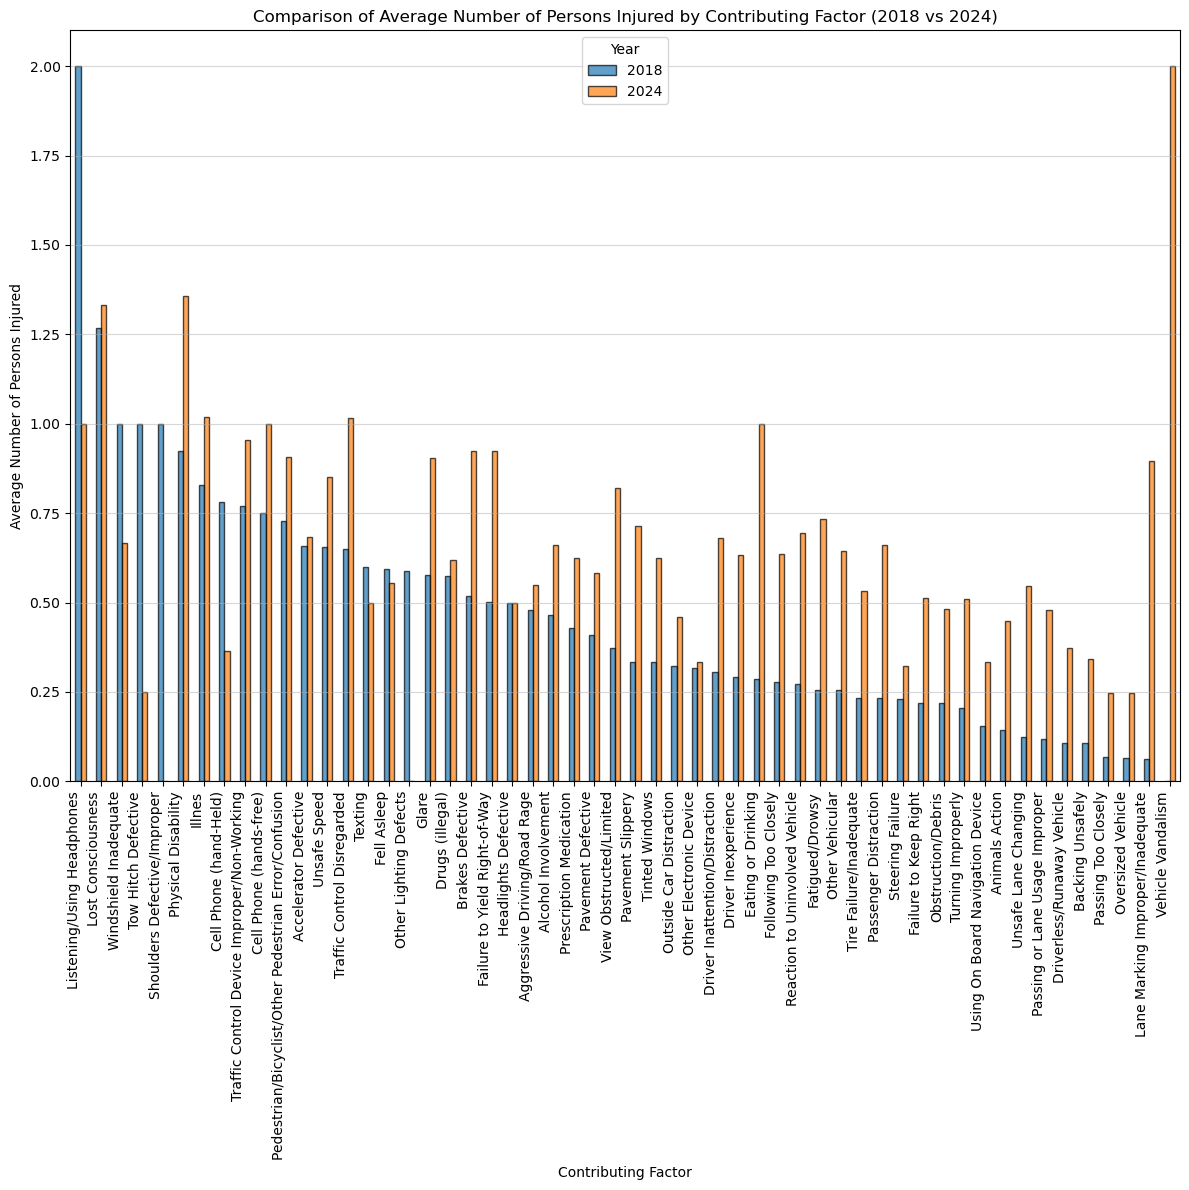

In [9]:
# Average number of persons injured for each contributing factor in 2018 and 2024
avg_injured_2018 = data_2018.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].mean().sort_values(ascending=False)
avg_injured_2024 = data_2024.groupby('CONTRIBUTING FACTOR VEHICLE 1')['NUMBER OF PERSONS INJURED'].mean().sort_values(ascending=False)

# Get the top 20 contributing factors for both years
top_20_factors_2018 = avg_injured_2018.head(20)
top_20_factors_2024 = avg_injured_2024.head(20)
# Plot for 2018
plt.figure(figsize=(12, 6))
top_20_factors_2018.plot(kind='bar', color='blue', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2018 (Average Injured)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()
# Plot for 2024
plt.figure(figsize=(12, 6))
top_20_factors_2024.plot(kind='bar', color='green', alpha=0.7, edgecolor='black')
plt.title('Top 20 Contributing Factors in 2024 (Average Injured)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()

# Compare the average number of persons injured for each contributing factor in 2018 and 2024
# Compare the average number of persons injured for each contributing factor in 2018 and 2024
common_factors = avg_injured_2018.index.intersection(avg_injured_2024.index)
avg_injured_comparison = pd.DataFrame({
    '2018': avg_injured_2018[common_factors],
    '2024': avg_injured_2024[common_factors]
})

avg_injured_comparison.plot(kind='bar', figsize=(12, 12), alpha=0.7, edgecolor='black')
plt.title('Comparison of Average Number of Persons Injured by Contributing Factor (2018 vs 2024)')
plt.xlabel('Contributing Factor')
plt.ylabel('Average Number of Persons Injured')
plt.xticks(rotation=90, ha='right')
plt.legend(title='Year')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.show()


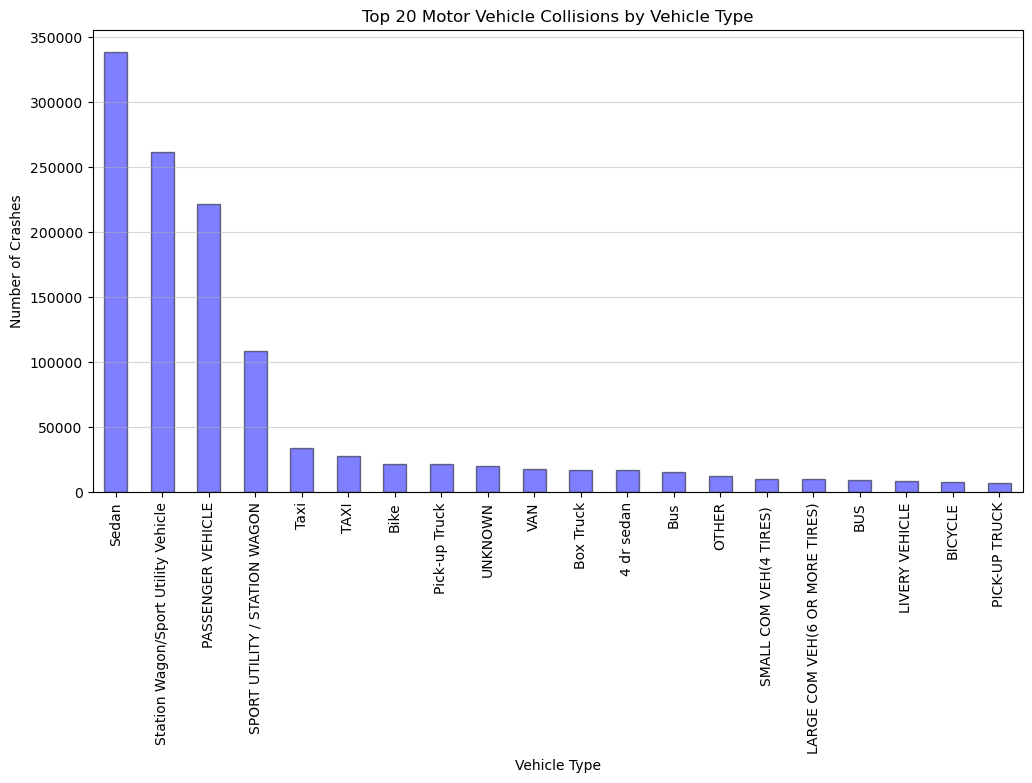

In [10]:
# plot crashes type of vehicle (merge COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5)

# Combine all vehicle type codes into a single column for analysis
vehicle_types = pd.concat([
    data['VEHICLE TYPE CODE 1'],
    data['VEHICLE TYPE CODE 2'],
    data['VEHICLE TYPE CODE 3'],
    data['VEHICLE TYPE CODE 4'],
    data['VEHICLE TYPE CODE 5']
])

# Get the 20 most common vehicle types
top_20_vehicle_types = vehicle_types.value_counts().head(20)

# Plot the crashes by the top 20 vehicle types
plt.figure(figsize=(12, 6))
top_20_vehicle_types.plot(kind='bar', color='blue', alpha=0.5, edgecolor='black')
plt.title('Top 20 Motor Vehicle Collisions by Vehicle Type')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
plt.show()

In [ ]:
# Filter data for the 24 months from January 2019 to December 2020

map_data_filtered_24_months = map_data[(map_data['Year'] == 2019) | (map_data['Year'] == 2020)]

# Ensure latitude and longitude are floats
map_data_filtered_24_months['LATITUDE'] = map_data_filtered_24_months['LATITUDE'].astype(float)
map_data_filtered_24_months['LONGITUDE'] = map_data_filtered_24_months['LONGITUDE'].astype(float)

# Add a 'Month-Year' column for grouping
map_data_filtered_24_months['Month-Year'] = map_data_filtered_24_months['Year'].astype(str) + '-' + map_data_filtered_24_months['Month'].astype(str).str.zfill(2)

# Filter the DataFrame for rows, then columns, then remove NaNs
heat_df_filtered_24_months = map_data_filtered_24_months[['LATITUDE', 'LONGITUDE', 'Month-Year']].dropna()

# Group data by 'Month-Year' and create a list of lists for each month
heat_data_24_months = [
    [[row['LATITUDE'], row['LONGITUDE']] for _, row in heat_df_filtered_24_months[heat_df_filtered_24_months['Month-Year'] == month].iterrows()]
    for month in sorted(heat_df_filtered_24_months['Month-Year'].unique())
]

# Create a map centered around New York City
map_24_months = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Add HeatMapWithTime to the map
hm_24_months = plugins.HeatMapWithTime(heat_data_24_months, auto_play=True, max_opacity=0.8)
hm_24_months.add_to(map_24_months)

# Display the map
map_24_months


C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_filtered_24_months['LATITUDE'] = map_data_filtered_24_months['LATITUDE'].astype(float)
C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_filtered_24_months['LONGITUDE'] = map_data_filtered_24_months['LONGITUDE'].astype(float)
C:\Users\idasa\AppData\Local\Temp\ipykernel_17720\2662581665.py:9: SettingWithCopyWarning: 


In [55]:
import folium
from folium.plugins import HeatMapWithTime, HeatMap, MarkerCluster
#Map for 2019 

#filter data for the year 2019
map_data_2019 = data[data['Year'] == 2019]

map_data_2019['Month'] = pd.to_datetime(map_data_2019['CRASH DATE']).dt.month
#Use only month 9
map_data_2019 = map_data_2019[map_data_2019['Month'] == 9]

# Keep only those where there is injury or fatality
map_data_2019 = map_data_2019[(map_data_2019['NUMBER OF PERSONS INJURED'] > 0) | (map_data_2019['NUMBER OF PERSONS KILLED'] > 0)]

# Ensure latitude and longitude are floats
map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)

# Create a map centered around New York City
map_2019 = folium.Map(location=[40.730610, -73.935242], zoom_start=11)

# Add a heatmap layer to the map with clearer points
#map_2019 = HeatMapWithTime(map_data_2019, auto_play=True, max_opacity=0.8).add_to(map_2019)

map_2019_heat = HeatMap(map_data_2019[['LATITUDE', 'LONGITUDE']], auto_play=True, max_opacity=0.8)
map_2019_heat.add_to(map_2019)

# Save the map to an HTML file
# map_2019.save('heatmap_2019.html')

# Display the map
map_2019


C:\Users\miran\AppData\Local\Temp\ipykernel_1460\2175954347.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['Month'] = pd.to_datetime(map_data_2019['CRASH DATE']).dt.month


In [62]:
import pandas as pd
import folium
from folium import plugins
map_data = data.copy()

map_data['Month'] = pd.to_datetime(map_data['CRASH DATE']).dt.month

# Filter data for September 2019 only
map_data_sep_2019 = map_data[
    (map_data['Year'] == 2019) & (map_data['Month'] == 9)
].copy()

# Keep only those where there is injury or fatality
map_data_sep_2019 = map_data_sep_2019[
    (map_data_sep_2019['NUMBER OF PERSONS INJURED'] > 0) | 
    (map_data_sep_2019['NUMBER OF PERSONS KILLED'] > 0)
]

# Ensure latitude and longitude are floats
map_data_sep_2019['LATITUDE'] = map_data_sep_2019['LATITUDE'].astype(float)
map_data_sep_2019['LONGITUDE'] = map_data_sep_2019['LONGITUDE'].astype(float)

# Drop rows with missing lat/lon
heat_df_sep_2019 = map_data_sep_2019[['LATITUDE', 'LONGITUDE']].dropna()

# Prepare data for HeatMap (list of [lat, lon] pairs)
heat_data_sep_2019 = heat_df_sep_2019.values.tolist()

# Create map centered around NYC
map_sep_2019 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

# Add HeatMap (no time slider since just one month)
hm = plugins.HeatMap(heat_data_sep_2019, max_opacity=0.8)
hm.add_to(map_sep_2019)

print("Size of data - number of rows: ", len(heat_data_sep_2019))

# Display map
map_sep_2019


Size of data - number of rows:  1341


In [100]:
import pandas as pd
import folium
from folium import plugins
map_data = data.copy()

map_data['Month'] = pd.to_datetime(map_data['CRASH DATE']).dt.month
map_data = map_data[(map_data['Month'] == 9)]
map_data['Hour'] = pd.to_datetime(map_data['CRASH TIME'], format='%H:%M').dt.hour
map_data = map_data[(map_data['Hour'] < 19) & (map_data['Hour'] > 14)]
map_data = map_data[(map_data['NUMBER OF PERSONS INJURED'] > 0) | (map_data['NUMBER OF PERSONS KILLED'] > 0)]
#map_data = map_data[(map_data['NUMBER OF PERSONS KILLED'] > 0)]

map_data_2019 = map_data[map_data['Year'] == 2019]
map_data_2020 = map_data[map_data['Year'] == 2020]

# Ensure latitude and longitude are floats
map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)

map_data_2020['LATITUDE'] = map_data_2020['LATITUDE'].astype(float)
map_data_2020['LONGITUDE'] = map_data_2020['LONGITUDE'].astype(float)

m = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
#n = folium.Map(SF, zoom_start=12)
# Define colors for the markers
color_2019 = 'blue'
color_2020 = 'red'

for index, row in map_data_2019.iterrows():
    folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], radius=3, color=color_2019).add_to(m)

for index, row in map_data_2020.iterrows():
    folium.CircleMarker(location=[row['LATITUDE'], row['LONGITUDE']], radius=3, color=color_2020).add_to(m)

C:\Users\miran\AppData\Local\Temp\ipykernel_1460\3245869319.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_1460\3245869319.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_1460\3245869319.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [101]:
# Add a custom legend
legend_html = '''
<div style="
    position: fixed;
    top: 10px; left: 50px; width: 120px; height: 63px; 
    background-color: white; z-index:9999; font-size:14px;
    border:2px solid grey; padding: 10px; text-align: left;">
    <i style="background:blue; width:10px; height:10px; display:inline-block; margin-right: 5px;"></i> Sep 2019<br>
    <i style="background:red; width:10px; height:10px; display:inline-block; margin-right: 5px;"></i> Sep 2020<br>
</div>
'''

m.get_root().html.add_child(folium.Element(legend_html))

#m.save('MapWithLegend.html')

from IPython.display import display
display(m)

In [110]:
import pandas as pd
import folium
from folium import plugins
map_data = data.copy()

map_data['Month'] = pd.to_datetime(map_data['CRASH DATE']).dt.month
map_data = map_data[(map_data['Month'] == 9)]
map_data['Hour'] = pd.to_datetime(map_data['CRASH TIME'], format='%H:%M').dt.hour
map_data = map_data[(map_data['Hour'] < 19) & (map_data['Hour'] > 14)]
hours = sorted(map_data['Hour'].unique())  # sorted hours
map_data = map_data[(map_data['NUMBER OF PERSONS INJURED'] > 0) | (map_data['NUMBER OF PERSONS KILLED'] > 0)]

map_data_2019 = map_data[map_data['Year'] == 2019]
map_data_2020 = map_data[map_data['Year'] == 2020]

# Ensure latitude and longitude are floats
map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)

map_data_2020['LATITUDE'] = map_data_2020['LATITUDE'].astype(float)
map_data_2020['LONGITUDE'] = map_data_2020['LONGITUDE'].astype(float)

map19 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
map20 = folium.Map(location=[40.730610, -73.935242], zoom_start=10)

heat_data_19 = [
    map_data_2019[map_data_2019['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

heat_data_20 = [
    map_data_2020[map_data_2020['Hour'] == hour][['LATITUDE', 'LONGITUDE']].values.tolist()
    for hour in hours
]

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_19,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map19)

# Add the HeatMapWithTime layer
plugins.HeatMapWithTime(
    heat_data_20,
    index=hours,         # labels for the time slider
    auto_play=True,
    max_opacity=0.8,
    radius=10,
    use_local_extrema=False
).add_to(map20)


map19
#Save the map to an HTML file
map19.save('heatmap_2019.html')


C:\Users\miran\AppData\Local\Temp\ipykernel_1460\4294187825.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LATITUDE'] = map_data_2019['LATITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_1460\4294187825.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  map_data_2019['LONGITUDE'] = map_data_2019['LONGITUDE'].astype(float)
C:\Users\miran\AppData\Local\Temp\ipykernel_1460\4294187825.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [113]:
#Save the map to an HTML file
map20.save('heatmap_2020.html')
map20